# FOSDIC vs ICOAADS R3 - Deck 281

Issue 1: ICOADS has Lat/Lon for deck 281, FOSDIC does not... where is this information obtained   
Issue 2: FOSDIC has 1000000+ entries, R3 has 100000 (thats 10x less)   
Issue 3: ICOADS has no way to connect the station number from the FOSDIC database as far as I can tell   

At the very least... can we confirm that the two datasources are the same database?

***In the FOSDIC there is a sourceno: 999 is a land station, otherwise vessel***

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

import datetime

## FOSDIC

read and do some more cleaning on an already thinned out initial fosdic set.  Thinned in the sense that not every column is maintained and date/times that are coded incompletely are removed

In [76]:
df = pd.read_csv('deck281_thinned.csv')

df = df.drop(labels=['Unnamed: 0'],axis=1).drop_duplicates()

df = df.dropna(subset=['datetime'])

df_datetime = df.set_index(pd.to_datetime(df.datetime))

#convert numeric stations to str
for i in range(0,1001):
    df_datetime.loc[df_datetime['stationno']==i,'stationno'] = str(i).zfill(3)

/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [80]:
### drop source not 999
df_datetime =df_datetime[df_datetime['sourceno']!='999']

In [81]:
df_datetime.sort_index().loc['1926-01']

,sourceno,stationno,latitude,longitude,year,month,day,hour,pressure,drybulbF,rh,watertempF,datetime
datetime,,,,,,,,,,,,,
1926-01-01 08:00:00+00:00,(03,776,NaN,NaN,26.0,1.0,1.0,8.0,NaN,NaN,NaN,NaN,1926-01-01 08:00:00+00:00
1926-01-01 08:00:00+00:00,J04,144,NaN,NaN,26.0,1.0,1.0,8.0,1022.7,NaN,NaN,NaN,1926-01-01 08:00:00+00:00
1926-01-01 08:00:00+00:00,N13,317,NaN,NaN,26.0,1.0,1.0,8.0,1015.9,58.0,94.0,NaN,1926-01-01 08:00:00+00:00
1926-01-01 12:00:00+00:00,J04,144,NaN,NaN,26.0,1.0,1.0,12.0,1018.3,NaN,NaN,NaN,1926-01-01 12:00:00+00:00
1926-01-01 12:00:00+00:00,N13,317,NaN,NaN,26.0,1.0,1.0,12.0,1015.9,65.0,66.0,NaN,1926-01-01 12:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926-01-31 12:00:00+00:00,N13,317,NaN,NaN,26.0,1.0,31.0,12.0,1008.8,60.0,89.0,NaN,1926-01-31 12:00:00+00:00
1926-01-31 12:00:00+00:00,(02,582,NaN,NaN,26.0,1.0,31.0,12.0,1013.9,75.0,78.0,72.0,1926-01-31 12:00:00+00:00
1926-01-31 16:00:00+00:00,N13,317,NaN,NaN,26.0,1.0,31.0,16.0,1007.5,56.0,94.0,NaN,1926-01-31 16:00:00+00:00


## ICOADS R3

In [137]:
filein = '/Volumes/MobileSSD/in_and_outbox/data_sets/ICOADS/Deck281/ICOADS_R3.0_Rqst499732_19260101-19450831.csv'
df_R3 = pd.read_csv(filein, error_bad_lines=False, parse_dates=True)


In [199]:
df_R3['datetime'] = pd.to_datetime({'year':df_R3['YR'],'month':df_R3['MO'],'day':df_R3['DY'],'hour':df_R3['HR']})
df_R3.datetime = df_R3.datetime.dt.tz_localize('UTC')
df_R3 = df_R3.set_index(df_R3.datetime)
df_R3v2 = df_R3
df_R3v2

,YR,MO,DY,HR,LAT,LON,IM,ATTC,TI,LI,...,QCE,LZ,QCZ,UID,RN1,RN2,RN3,RSA,IRF,datetime
datetime,,,,,,,,,,,,,,,,,,,,,
1926-01-01 11:00:00+00:00,1926,1,1,11.0,41.5,315.5,1,3,0,1,...,NaN,NaN,NaN,0ELU56,3,1,0,2,1,1926-01-01 11:00:00+00:00
1926-01-01 15:00:00+00:00,1926,1,1,15.0,41.5,315.5,1,3,0,1,...,NaN,NaN,NaN,0ELUIB,3,1,0,2,1,1926-01-01 15:00:00+00:00
1926-01-01 16:00:00+00:00,1926,1,1,16.0,33.5,242.5,1,3,0,1,...,NaN,NaN,NaN,0ELUK6,3,1,0,2,1,1926-01-01 16:00:00+00:00
1926-01-01 19:00:00+00:00,1926,1,1,19.0,41.5,315.5,1,3,0,1,...,NaN,NaN,NaN,0ELUPV,3,1,0,2,1,1926-01-01 19:00:00+00:00
1926-01-01 20:00:00+00:00,1926,1,1,20.0,33.5,242.5,1,3,0,1,...,NaN,NaN,NaN,0ELURP,3,1,0,2,1,1926-01-01 20:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945-08-30 23:00:00+00:00,1945,8,30,23.0,17.5,140.5,1,3,0,1,...,NaN,NaN,NaN,0N74SD,3,1,0,2,1,1945-08-30 23:00:00+00:00
1945-08-31 00:00:00+00:00,1945,8,31,0.0,51.5,180.5,1,3,0,1,...,NaN,NaN,NaN,0N74T7,3,1,0,2,1,1945-08-31 00:00:00+00:00
1945-08-31 03:00:00+00:00,1945,8,31,3.0,17.5,140.5,1,3,0,1,...,NaN,NaN,NaN,0N753O,3,1,0,2,1,1945-08-31 03:00:00+00:00


In [200]:
df_R3v2.index = df_R3.index.round('4h') - datetime.timedelta(hours=7)


***Initial comparision***

Looking at just January of 1926, trying to find matching entries

- R3 has 236 entries total
- FOSDIC has 960 if looking at '999' source id and 264 for non-999

(990.0, 1050.0)

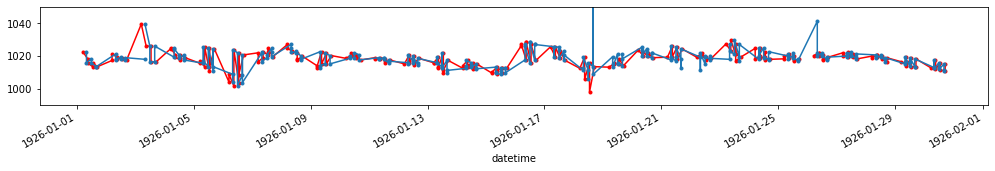

In [203]:
fig, ax = plt.subplots(figsize=(17, 2))
(df_R3v2.loc['1926-01-01':'1926-01-30'].SLP).plot(color='r',marker='.',ax=ax)
df_datetime.sort_index().loc['1926-01-01':'1926-01-30'].pressure.plot(marker='.',ax=ax)
ax.set_ylim([990,1050])

In [196]:
df_R3v2.loc['1926-01-01':'1926-01-30']

,YR,MO,DY,HR,LAT,LON,IM,ATTC,TI,LI,...,QCE,LZ,QCZ,UID,RN1,RN2,RN3,RSA,IRF,datetime
datetime,,,,,,,,,,,,,,,,,,,,,
1926-01-01 05:00:00+00:00,1926,1,1,11.0,41.5,315.5,1,3,0,1,...,NaN,NaN,NaN,0ELU56,3,1,0,2,1,1926-01-01 11:00:00
1926-01-01 09:00:00+00:00,1926,1,1,15.0,41.5,315.5,1,3,0,1,...,NaN,NaN,NaN,0ELUIB,3,1,0,2,1,1926-01-01 15:00:00
1926-01-01 09:00:00+00:00,1926,1,1,16.0,33.5,242.5,1,3,0,1,...,NaN,NaN,NaN,0ELUK6,3,1,0,2,1,1926-01-01 16:00:00
1926-01-01 13:00:00+00:00,1926,1,1,19.0,41.5,315.5,1,3,0,1,...,NaN,NaN,NaN,0ELUPV,3,1,0,2,1,1926-01-01 19:00:00
1926-01-01 13:00:00+00:00,1926,1,1,20.0,33.5,242.5,1,3,0,1,...,NaN,NaN,NaN,0ELURP,3,1,0,2,1,1926-01-01 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926-01-30 09:00:00+00:00,1926,1,30,18.0,27.5,269.5,1,3,0,1,...,NaN,NaN,NaN,0EN4Z3,3,1,0,2,1,1926-01-30 18:00:00
1926-01-30 13:00:00+00:00,1926,1,30,20.0,33.5,242.5,1,3,0,1,...,NaN,NaN,NaN,0EN52Q,3,1,0,2,1,1926-01-30 20:00:00
1926-01-30 13:00:00+00:00,1926,1,30,21.0,25.5,277.5,1,3,0,1,...,NaN,NaN,NaN,0EN55S,3,1,0,2,1,1926-01-30 21:00:00


In [195]:
df_datetime.sort_index().loc['1926-01-01':'1926-01-30']

,sourceno,stationno,latitude,longitude,year,month,day,hour,pressure,drybulbF,rh,watertempF,datetime
datetime,,,,,,,,,,,,,
1926-01-01 08:00:00+00:00,(03,776,NaN,NaN,26.0,1.0,1.0,8.0,NaN,NaN,NaN,NaN,1926-01-01 08:00:00+00:00
1926-01-01 08:00:00+00:00,J04,144,NaN,NaN,26.0,1.0,1.0,8.0,1022.7,NaN,NaN,NaN,1926-01-01 08:00:00+00:00
1926-01-01 08:00:00+00:00,N13,317,NaN,NaN,26.0,1.0,1.0,8.0,1015.9,58.0,94.0,NaN,1926-01-01 08:00:00+00:00
1926-01-01 12:00:00+00:00,J04,144,NaN,NaN,26.0,1.0,1.0,12.0,1018.3,NaN,NaN,NaN,1926-01-01 12:00:00+00:00
1926-01-01 12:00:00+00:00,N13,317,NaN,NaN,26.0,1.0,1.0,12.0,1015.9,65.0,66.0,NaN,1926-01-01 12:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926-01-30 12:00:00+00:00,(02,582,NaN,NaN,26.0,1.0,30.0,12.0,1013.2,72.0,91.0,72.0,1926-01-30 12:00:00+00:00
1926-01-30 12:00:00+00:00,J12,790,NaN,NaN,26.0,1.0,30.0,12.0,1012.2,NaN,NaN,NaN,1926-01-30 12:00:00+00:00
1926-01-30 16:00:00+00:00,N13,317,NaN,NaN,26.0,1.0,30.0,16.0,1014.9,64.0,90.0,NaN,1926-01-30 16:00:00+00:00
